**<h1>RenAIssance L.L.E. Challenge</h1>**

**<h3>Imports</h3>**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta
from math import sqrt
from keras import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

**<h3>Reading CSV file</h3>**

In [2]:
df_import = pd.read_csv(r'/home/alihan/Desktop/Leren & Beslissen/General/Data(LLE)/Data/Houses/Houses58-75/House64-1m.csv')

In [3]:
df_export = pd.read_csv(r'/home/alihan/Desktop/Leren & Beslissen/General/Data(LLE)/Data/Houses/Houses58-75/House64-1m.csv')

In [4]:
df_weather = pd.read_csv(r'/home/alihan/Desktop/Leren & Beslissen/General/Data(LLE)/Data/Weather/weather_data.csv')

**<h3>Generating dataframes</h3>**

**<h6>Dataframe import</h6>**

In [5]:
df_import.set_index('timestamp', inplace = True)
df_import.index = pd.to_datetime(df_import.index)
df_import = df_import.resample('5T').mean()
df_import = df_import.loc['2020-04-01 04:00:00+02:00':'2020-04-08 03:59:00+02:00']
df_import

,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW
timestamp,,,,,
2020-04-01 04:00:00+02:00,0.0,0.264,0.0,0.264,0.264
2020-04-01 04:05:00+02:00,0.0,0.276,0.0,0.276,0.276
2020-04-01 04:10:00+02:00,0.0,0.252,0.0,0.252,0.252
2020-04-01 04:15:00+02:00,0.0,0.264,0.0,0.264,0.264
2020-04-01 04:20:00+02:00,0.0,0.180,0.0,0.180,0.180
...,...,...,...,...,...
2020-04-08 03:35:00+02:00,0.0,0.108,0.0,0.108,0.108
2020-04-08 03:40:00+02:00,0.0,0.096,0.0,0.096,0.096
2020-04-08 03:45:00+02:00,0.0,0.108,0.0,0.108,0.108


**<h6>Dataframe Export </h6>**

In [6]:
df_export['timestamp'] = pd.to_datetime(df_export.timestamp, format='%Y-%m-%d %H:%M:%S')
df_export['HH'] = df_export['timestamp'].dt.hour
df_export['Date'] = df_export['timestamp'].dt.date
df_export['Minute'] = df_export['timestamp'].dt.minute
df_export['Date'] = pd.to_datetime(df_export['Date']).dt.strftime('%Y%m%d').astype(int)
df_export = df_export.set_index('timestamp')
df_export = df_export.loc['2020-04-01 04:00:00+02:00':'2020-04-08 03:59:00+02:00']
df_export

,house,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW,HH,Date,Minute
timestamp,,,,,,,,,
2020-04-01 04:00:00+02:00,House64,0.0,0.30,0.0,0.30,0.30,4,20200401,0
2020-04-01 04:01:00+02:00,House64,0.0,0.30,0.0,0.30,0.30,4,20200401,1
2020-04-01 04:02:00+02:00,House64,0.0,0.24,0.0,0.24,0.24,4,20200401,2
2020-04-01 04:03:00+02:00,House64,0.0,0.24,0.0,0.24,0.24,4,20200401,3
2020-04-01 04:04:00+02:00,House64,0.0,0.24,0.0,0.24,0.24,4,20200401,4
...,...,...,...,...,...,...,...,...,...
2020-04-08 03:55:00+02:00,House64,0.0,0.12,0.0,0.12,0.12,3,20200408,55
2020-04-08 03:56:00+02:00,House64,0.0,0.12,0.0,0.12,0.12,3,20200408,56
2020-04-08 03:57:00+02:00,House64,0.0,0.06,0.0,0.06,0.06,3,20200408,57


**<h6>Dataframe Weather </h6>**

In [7]:
df_weather = df_weather.drop(columns=['    Y', '    O', '    S', '    R', '    M', '   WW', '    N', '   VV', '    P', 'Unnamed: 0', '  STN', '   IX', '   DD', '   FH', '   FF', '   FX', ' T10N', '   TD', '   DR', '   RH', '    U', '    T'])
df_weather = df_weather.rename(columns={'YYYYMMDD': 'Date', '   HH':'HH'})
df_weather

,Date,HH,SQ,Q
0,20180801,1,0,0
1,20180801,2,0,0
2,20180801,3,0,0
3,20180801,4,0,0
4,20180801,5,5,15
...,...,...,...,...
18283,20200831,20,0,0
18284,20200831,21,0,0
18285,20200831,22,0,0
18286,20200831,23,0,0


**<h3>IMPORT_KW</h3>**

In [8]:
import_kw = df_import['IMPORT_KW']
len_test = 388
train = list(import_kw)[len_test:]
test = list(import_kw)[:len_test]

**<h6>Training</h6>**

In [9]:
windowSize, X_train, y_train = 100, [], []
for index in range(len(test)-windowSize):
    X_train.append(train[index:index+windowSize])
    y_train.append(train[index+windowSize])

**<h6>Model</h6>**

In [10]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(100,1), return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 2s 46ms/step - loss: 0.3492 - mae: 0.3935
Epoch 2/5
9/9 [==============================] - 0s 56ms/step - loss: 0.2750 - mae: 0.3183
Epoch 3/5
9/9 [==============================] - 1s 60ms/step - loss: 0.2294 - mae: 0.2671
Epoch 4/5
9/9 [==============================] - 1s 65ms/step - loss: 0.2018 - mae: 0.2323
Epoch 5/5
9/9 [==============================] - 1s 65ms/step - loss: 0.1907 - mae: 0.2398


In [11]:
y_train_pred_model = model.predict(X_train)

**<h6>Test</h6>**

In [12]:
windowSize, X_test, y_test = 100, [], []
for index in range(len(test)-windowSize):
    X_test.append(test[index:index+windowSize])
    y_test.append(test[index+windowSize])

In [13]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((len(X_test), 100,1))

In [14]:
y_test_pred_model = model.predict(X_test)

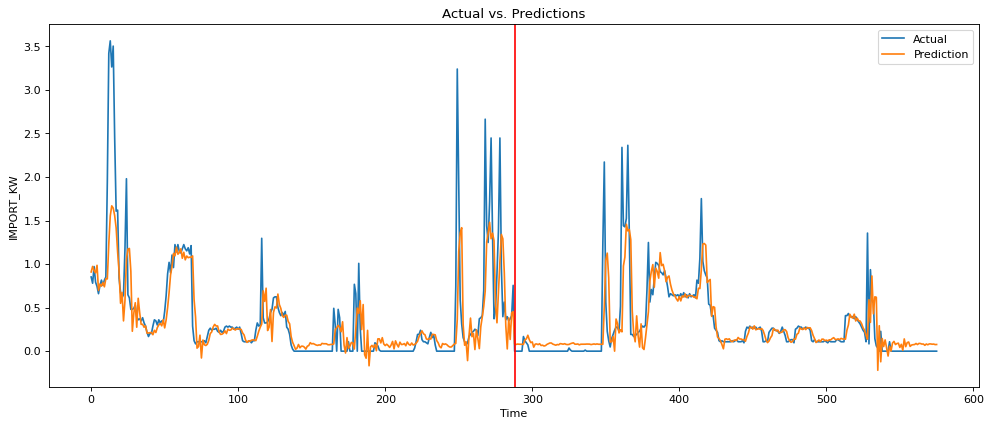

In [16]:
def plot_result(y_train, y_test, y_train_pred_model, y_test_pred_model):
    actual = np.append(y_train, y_test)
    predictions = np.append(y_train_pred_model, y_test_pred_model)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(y_train), color='r')
    plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_train_pred_model, y_test_pred_model)

**<h3>EXPORT_KW</h3>**

In [ ]:
next_hour = df_export["HH"].iloc[-1]+1
current_date = df_export['Date'].iloc[-1]
df_weather_2 = df_weather.loc[(df_weather['HH'] == next_hour) & (df_weather['Date'] == current_date)]
index = np.linspace(int(df_weather_2.index.values), int(df_weather_2.index.values)+23)
df_predict = df_weather[df_weather.index.isin(index)]
df_predict

,Date,HH,SQ,Q
14787,20200408,4,0,0
14810,20200409,3,0,0


In [ ]:
df_house = df_export.groupby(['Date', 'HH'])['EXPORT_KW'].mean().reset_index()
df_house.loc[df_house["HH"] == 0, 'HH'] = 24
df_house

,Date,HH,EXPORT_KW
0,20200401,4,0.000
1,20200401,5,0.000
2,20200401,6,0.000
3,20200401,7,0.000
4,20200401,8,0.012
...,...,...,...
163,20200407,23,0.000
164,20200408,24,0.000
165,20200408,1,0.000
166,20200408,2,0.000


In [ ]:
df_training = pd.merge(df_weather, df_house, on=["Date", "HH"])
df_training

,Date,HH,SQ,Q,EXPORT_KW
0,20200401,4,0,0,0.000
1,20200401,5,0,0,0.000
2,20200401,6,7,21,0.000
3,20200401,7,7,62,0.000
4,20200401,8,0,54,0.012
...,...,...,...,...,...
163,20200407,24,0,0,0.000
164,20200408,1,0,0,0.000
165,20200408,2,0,0,0.000
166,20200408,3,0,0,0.000


In [ ]:
X_train = df_training[['   SQ', '    Q']].values
X_test = df_predict[['   SQ', '    Q']].values
Y_train = df_training['EXPORT_KW'].values.reshape(-1,1)

**<h6> Model</h6>**

In [ ]:
def polynomial(X, degree):
    poly = PolynomialFeatures(degree) 
    poly.fit(X)
    X_poly = poly.transform(X)
    return X_poly

# Generate polynomial dataset (both training and test)
poly_train = polynomial(X_train, 4)
poly_test = polynomial(X_test, 4)
    
# Scale all features using the MinMaxScaler
scaler = MinMaxScaler().fit(poly_train)
poly_train_scaled = scaler.transform(poly_train)
    
scaler = MinMaxScaler().fit(poly_test)
poly_test_scaled = scaler.transform(poly_test)

# Compute and print RMSE using your code above on the training set and on the test set
lr = LinearRegression().fit(poly_train_scaled, Y_train)
# Y_poly_pred_train = lr.predict(poly_train_scaled)  
Y_poly_pred_test = lr.predict(poly_test_scaled)

**<h3> Data to CSV </h3>**

**<h6> Dataframe predicted import </h6>**

In [ ]:
train = import_kw[len_test:]
test = import_kw[:len_test]
print(test)
data = y_test_pred_model
df_prediction_import = pd.DataFrame(data, columns = ['RNN_prediction_IMPORT_KW'])
df_prediction_import['timestamp'] = pd.date_range(start=test.index[0], periods=len(df_prediction_import), freq='5T')
df_prediction_import.set_index('timestamp', inplace = True)
df_prediction_import.index= pd.to_datetime(df_prediction_import.index)
df_prediction_import

timestamp
2020-04-01 04:00:00+02:00    0.264
2020-04-01 04:05:00+02:00    0.276
2020-04-01 04:10:00+02:00    0.252
2020-04-01 04:15:00+02:00    0.264
2020-04-01 04:20:00+02:00    0.180
                             ...  
2020-04-02 11:55:00+02:00    0.000
2020-04-02 12:00:00+02:00    0.000
2020-04-02 12:05:00+02:00    0.000
2020-04-02 12:10:00+02:00    0.000
2020-04-02 12:15:00+02:00    0.000
Freq: 5T, Name: IMPORT_KW, Length: 388, dtype: float64


,RNN_prediction_IMPORT_KW
timestamp,
2020-04-01 04:00:00+02:00,0.067423
2020-04-01 04:05:00+02:00,0.065775
2020-04-01 04:10:00+02:00,0.066555
2020-04-01 04:15:00+02:00,0.066256
2020-04-01 04:20:00+02:00,0.066014
...,...
2020-04-02 03:35:00+02:00,0.065796
2020-04-02 03:40:00+02:00,0.065551
2020-04-02 03:45:00+02:00,0.065537


**<h6> Dataframe predicted export </h6>**

In [ ]:
Y_pred_5minutes = np.repeat(Y_poly_pred_test,12)
# setting all negative values to 0
Y_pred_5minutes = [0 if i < 0 else i for i in Y_pred_5minutes]
df_prediction_export = pd.DataFrame(Y_pred_5minutes, columns = ['prediction_EXPORT_KW'])
df_prediction_export['timestamp'] = pd.date_range(start=df_export.index[-1]+ timedelta(minutes=1), periods=len(df_prediction_export), freq='5T')
df_prediction_export.set_index('timestamp', inplace = True)
df_prediction_export.index= pd.to_datetime(df_prediction_export.index)
df_prediction_export

,prediction_EXPORT_KW
timestamp,
2020-04-08 04:00:00+02:00,0
2020-04-08 04:05:00+02:00,0
2020-04-08 04:10:00+02:00,0
2020-04-08 04:15:00+02:00,0
2020-04-08 04:20:00+02:00,0
2020-04-08 04:25:00+02:00,0
2020-04-08 04:30:00+02:00,0
2020-04-08 04:35:00+02:00,0
2020-04-08 04:40:00+02:00,0
